In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [4]:
class TimeSeriesData():
    
    def __init__(self,num_points,xMin,xMaX):
       
        
        
        self.xMin = xMin
        self.xMaX = xMaX
        self.num_points = num_points
        self.resolution = (xMaX- xMin)/num_points
        self.x_data = np.linspace(xMin,xMaX,num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps  ,return_batch_ts = False):
        
        # we have to create a random starting point for each batch of data
        rand_start = np.random.rand(batch_size,1)
        
        #Convert the above value to time series
        ts_start = rand_start*(self.xMaX -self.xMin -(steps * self.resolution))
        
        #create a batch time series on x_axis 
        batch_ts = ts_start+np.arange(0.0,steps+1)* self.resolution
        
        #Create Y data for time series X from previous data
        y_batch = np.sin(batch_ts)
        
        #Formating RNN
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1) , batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)
        
        
        
    
        

        
        
        

In [5]:
ts_data = TimeSeriesData(250,0,10)

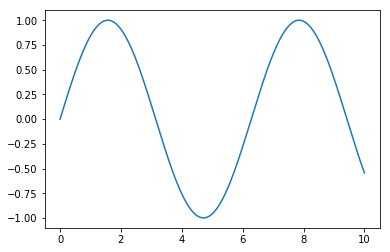

In [6]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [7]:
num_time_steps = 30

In [8]:
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

In [9]:
ts

array([[6.55201464, 6.59201464, 6.63201464, 6.67201464, 6.71201464,
        6.75201464, 6.79201464, 6.83201464, 6.87201464, 6.91201464,
        6.95201464, 6.99201464, 7.03201464, 7.07201464, 7.11201464,
        7.15201464, 7.19201464, 7.23201464, 7.27201464, 7.31201464,
        7.35201464, 7.39201464, 7.43201464, 7.47201464, 7.51201464,
        7.55201464, 7.59201464, 7.63201464, 7.67201464, 7.71201464,
        7.75201464]])

In [10]:
ts.shape

(1, 31)

In [11]:
ts.flatten().shape

(31,)

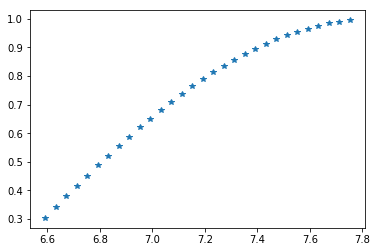

In [12]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

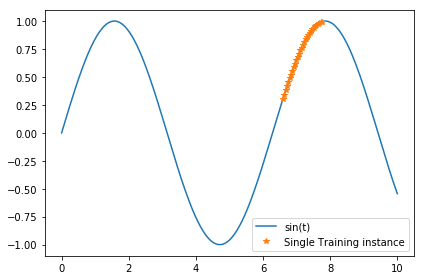

In [13]:
plt.plot(ts_data.x_data,ts_data.y_true, label = "sin(t)")
plt.plot(ts.flatten()[1:],y2.flatten(),'*', label = 'Single Training instance')
plt.legend()
plt.tight_layout()

In [14]:
#Training  Data

In [15]:
train_inst = np.linspace(5,5+ts_data.resolution*(num_time_steps+1),num_time_steps+1)

In [16]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

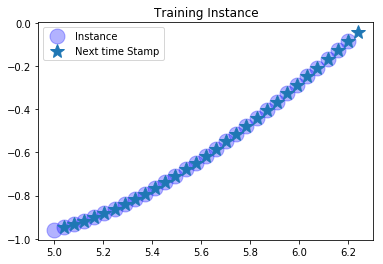

In [17]:
plt.title("Training Instance")
plt.plot(train_inst[:-1],ts_data.ret_true(train_inst[:-1]),'bo',markersize = 15,alpha = .3,label = "Instance")
#now we want the next time stamp
plt.plot(train_inst[1:],ts_data.ret_true(train_inst[1:]),'*',markersize = 15,alpha = 1, label = "Next time Stamp")
plt.legend()


# Creating The Model

In [18]:
tf.compat.v1.reset_default_graph()

In [19]:
num_inputs = 1

In [20]:
num_neurons = 100


In [21]:
num_outputs = 1

In [22]:
#learning rate
learning_rate = 0.0001

In [23]:
,#training iterations
num_trainining_iterations = 2000

In [24]:
batch_size = 1

In [25]:
#PLACEHOLDERS

In [26]:
X = tf.compat.v1.placeholder(tf.float32,[None,num_time_steps,num_inputs])

In [27]:
y = tf.compat.v1.placeholder(tf.float32,[None,num_time_steps,num_outputs])

In [28]:
#RNN CELL Layer

In [37]:
cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=num_neurons,activation=tf.nn.relu)
cell = tf.compat.v1.nn.rnn_cell.ResidualWrapper(cell,output_size = num_outputs)

TypeError: __init__() got an unexpected keyword argument 'output_size'

In [30]:
tf.keras.layers.SimpleRNNCell()

SyntaxError: invalid syntax (<ipython-input-30-fc1dd1b5fcda>, line 1)